In [88]:
from pyntcloud import PyntCloud 
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import pandas as pd
import os
import sys
import pdb

def Detect_edges():
    # Load the XYZ file as a DataFrame
    #df = pd.read_csv("/Users/aagaa/Documents/GitHub/R-D/Code/Leihui Code/dataset/synethsis/cube-isometric.xyz", sep=" ", usecols=[0, 1, 2], names=["x", "y", "z"])
    df = pd.read_csv("/Users/aagaa/Documents/GitHub/R-D/Code/Leihui Code/dataset/scanning_repository/horse.xyz", sep=" ", usecols=[0, 1, 2], names=["x", "y", "z"])

    # Convert DataFrame to a PyntCloud object
    pcd1 = PyntCloud(df)

    #pcd1 = PyntCloud.from_file("/Users/aagaa/Documents/GitHub/R-D/Code/Leihui Code/dataset/synethsis/cube-isometric.xyz")
    #pcd1 = PyntCloud.from_file("/TetrahedronMultiple.pcd")
    #pcd1 = PyntCloud.from_file("/ArtificialPointClouds/CubeFractal2.pcd")
    output_dir = "./detected_edge/"

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    # define hyperparameters
    k_n = 6
    thresh = 0.03

    pcd_np = np.zeros((len(pcd1.points),6))

    # find neighbors
    kdtree_id = pcd1.add_structure("kdtree")
    k_neighbors = pcd1.get_neighbors(k=k_n, kdtree=kdtree_id) 

    # calculate eigenvalues
    ev = pcd1.add_scalar_field("eigen_values", k_neighbors=k_neighbors)

    x = pcd1.points['x'].values 
    y = pcd1.points['y'].values 
    z = pcd1.points['z'].values 

    e1 = pcd1.points['e3('+str(k_n+1)+')'].values
    e2 = pcd1.points['e2('+str(k_n+1)+')'].values
    e3 = pcd1.points['e1('+str(k_n+1)+')'].values

    sum_eg = np.add(np.add(e1,e2),e3)
    sigma = np.divide(e1,sum_eg)
    sigma_value = sigma
    #pdb.set_trace()
    #img = ax.scatter(x, y, z, c=sigma, cmap='jet')

    # visualize the edges
    sigma = sigma>thresh

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Visualize each one of the eigenvalues
    #img = ax.scatter(x, y, z, c=e1, cmap='jet')
    #img = ax.scatter(x, y, z, c=e2, cmap='jet')
    #img = ax.scatter(x, y, z, c=e3, cmap='jet')

    # visualize the edges
    img = ax.scatter(x, y, z, c=sigma, cmap='jet')
    #img = ax.scatter(x, y, z, c=sigma, cmap=plt.hot())

    fig.colorbar(img) 
    plt.show() 

    # Save the edges and point cloud
    thresh_min = sigma_value < thresh
    sigma_value[thresh_min] = 0
    thresh_max = sigma_value > thresh
    sigma_value[thresh_max] = 255

    pcd_np[:,0] = x
    pcd_np[:,1] = y
    pcd_np[:,2] = z
    pcd_np[:,3] = sigma_value

    edge_np = np.delete(pcd_np, np.where(pcd_np[:,3] == 0), axis=0) 

    clmns = ['x','y','z','red','green','blue']
    pcd_pd = pd.DataFrame(data=pcd_np,columns=clmns)
    pcd_pd['red'] = sigma_value.astype(np.uint8)

    #pcd_points = PyntCloud(pd.DataFrame(data=pcd_np,columns=clmns))
    pcd_points = PyntCloud(pcd_pd)
    edge_points = PyntCloud(pd.DataFrame(data=edge_np,columns=clmns))

    # pcd_points.plot()
    # edge_points.plot()

    PyntCloud.to_file(pcd_points,output_dir+'pointcloud_edges.ply')   # Save the whole point cloud by painting the edge points
    PyntCloud.to_file(edge_points,output_dir+'edges.ply')             # Save just the edge points

    return df

In [33]:
df = pd.read_csv("/Users/aagaa/Documents/GitHub/R-D/Code/Leihui Code/dataset/SelfGeneratedClouds/worm_shaft.xyz", sep=" ", usecols=[0, 1, 2], names=["x", "y", "z"])
print(df)

                 x         y         z
0        26.405123  5.405199  4.876316
1        26.451807  5.584825  4.668721
2        23.530161  5.576731  4.680278
3        30.996456 -6.772193 -2.664432
4        23.530161 -6.841035 -2.489122
...            ...       ...       ...
102283  105.184875  0.704562 -7.217567
102284  104.651947 -5.738365  0.968243
102285  104.651947  5.738220 -0.966674
102286   54.591030  7.435574  7.574713
102287   29.391014  7.435575  7.574714

[102288 rows x 3 columns]


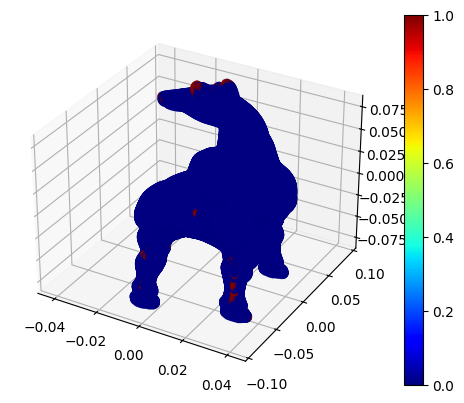

c:\Users\aagaa\anaconda3\envs\rd\Lib\site-packages\pyntcloud\io\ply.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = property_formats[str(df.dtypes[i])[0]]
c:\Users\aagaa\anaconda3\envs\rd\Lib\site-packages\pyntcloud\io\ply.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = property_formats[str(df.dtypes[i])[0]]
c:\Users\aagaa\anaconda3\envs\rd\Lib\site-packages\pyntcloud\io\ply.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

,x,y,z,e1(7),e2(7),e3(7)
0,-0.002022,-0.040178,-0.000863,6.064843e-07,2.367927e-07,9.934180e-09
1,0.000403,-0.062018,-0.005498,3.853796e-06,6.366462e-07,2.508779e-07
2,-0.002863,-0.060055,-0.009567,3.170578e-07,1.475219e-07,6.619551e-08
3,-0.001945,-0.041256,-0.001349,7.696200e-07,2.204811e-07,1.296702e-08
4,-0.001867,-0.042348,-0.001900,7.068699e-07,4.883097e-07,5.103119e-09
...,...,...,...,...,...,...
48480,-0.000492,-0.051987,-0.006036,5.500694e-07,3.512143e-07,5.690659e-09
48481,-0.000473,-0.060511,-0.015761,1.390356e-06,6.537532e-07,1.022425e-09
48482,0.000096,-0.059130,-0.013502,1.142324e-06,4.293902e-07,4.115708e-09
48483,0.000209,-0.060390,-0.015222,1.309303e-06,4.263536e-07,5.720572e-08


In [89]:
Detect_edges()